# <span style=color:navy> Web Scraping - IMDB or Metacritic?</span>


*Present by Ashlea Pin-Jui Huang*

![alt text](https://kutv.com/resources/media/2b2d773c-082d-4295-ae21-c00e1fd98f2b-large16x9_Favoritesof2019B.jpg)

### Objective

Who doesn't like movies? We all enjojy watching movies every now and then? Before deciding to watch a movie. Most people tend to check on the movie rating before making a decision. The Ineternet Movie Database aka IMDB is a website that contains a huge amount of data on films including summary of the film, casts, ratings, genres, released year and so on. 

However, IMDB isn't the only website that offer us database of world cinema. There are also popular websites such as rotten tomatoes and metacritic. As being a movie lover myself, I think it would be interesting to explore the movie scores between IMDB and metacritic.

My goal here is to examine the data we grab from webscraping, see the comparison between the two and find out which website has more reliable information when it comes to movie scores. I will be working on the movies from 2019, and since IMDB already has the movie scores from metacritic, we will use IMDB for web scraping and exploration.


### Data Mining

In [387]:
import pandas as pd
from bs4 import BeautifulSoup
from requests import get
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep
from random import randint
import numpy
from numpy import arange

As usual, let's first load the data. Since there will be a lot of text, I will only print out the first 500.

In [310]:
url = 'http://www.imdb.com/search/title?release_date=2019&sort=num_votes,desc&page=1'
response = get(url)
print(response.text[:500])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


Let's first start with the first page and see what we are dealing with.

In [311]:
soup = BeautifulSoup(response.text, 'lxml')
container = soup.find_all('div', class_ = 'lister-item mode-advanced')
print(len(container))

50


According to the page, it looks like we have 50 matches for the containers. I am going to inspect the first movie on this page first to see if I can successfully grab the information I need.

In [312]:
first_page = soup.find('div', class_ = 'lister-item-content')
print(len(first_page))

13


In [313]:
first_page.div

<div class="ratings-bar">
<div class="inline-block ratings-imdb-rating" data-value="8.6" name="ir">
<span class="global-sprite rating-star imdb-rating"></span>
<strong>8.6</strong>
</div>
<div class="inline-block ratings-user-rating">
<span class="userRatingValue" data-tconst="tt7286456" id="urv_tt7286456">
<span class="global-sprite rating-star no-rating"></span>
<span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
</span>
<div class="starBarWidget" id="sb_tt7286456">
<div class="rating rating-list" data-auth="" data-ga-identifier="" data-starbar-class="rating-list" data-user="" id="tt7286456|imdb|8.6|8.6|||advsearch|title" itemprop="aggregateRating" itemscope="" itemtype="http://schema.org/AggregateRating" title="Users rated this 8.6/10 (669,072 votes) - click stars to rate">
<meta content="8.6" itemprop="ratingValue"/>
<meta content="10" itemprop="bestRating"/>
<meta content="669072" itemprop="ratingCount"/>
<span class="rating-bg"> </span>
<span c

As seen above, these are all the information contained in div class. I can see that joker is the first movie, I am going to extract that out.

In [328]:
#movie name
first_page.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt7286456/">Joker</a>
<span class="lister-item-year text-muted unbold">(2019)</span>
</h3>

In [315]:
first_page.h3.a

<a href="/title/tt7286456/">Joker</a>

In [327]:
first_name = first_page.h3.a.text
first_name

'Joker'

In [325]:
#year released
first_year = first_page.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2019)</span>

In [326]:
first_year = first_year.text
first_year

'(2019)'

In [319]:
#imdb rating
first_imdb = first_movie.strong.text
first_imdb

'8.6'

In [320]:
#metasocre
first_mscore = first_page.find('span', class_ = 'metascore mixed')
first_mscore = first_mscore.text
print(first_mscore)

59        


In [329]:
#votes
first_votes = first_page.find('span', attrs = {'name':'nv'})
print(first_votes)

<span data-value="669072" name="nv">669,072</span>


In [322]:
first_votes.text

'669,072'

In [323]:
top_movie_mscore = container[14].find('div', class_ = 'ratings-metascore')
print(top_movie_mscore)

<div class="inline-block ratings-metascore">
<span class="metascore mixed">53        </span>
        Metascore
            </div>


### Findings

Now we have done scraping for the information we need to put the information into a dataframe. To do that I am going to create empty lists for the variables - names, years, ratings, genres and votes.

In [292]:
#Create empty lists for dataframe
names = []
years = []
imdb_ratings = []
metascores = []
genres = []
votes = []
# Extract data from individual movie container
for container in container:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
        name = container.h3.a.text
        names.append(name)
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
        genre = container.find('span', class_ = 'genre').text
        genres.append(genre)
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [293]:
#displaying the dataframe
df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,                        
'votes': votes,
'genre':genres
})
df.head()

,movie,year,imdb,metascore,votes,genre
0,Joker,(2019),8.6,59,669072,"\nCrime, Drama, Thriller"
1,Avengers: Endgame,(2019),8.5,78,664627,"\nAction, Adventure, Drama"
2,Captain Marvel,(2019),6.9,64,393694,"\nAction, Adventure, Sci-Fi"
3,Once Upon a Time... in Hollywood,(2019),7.7,83,377962,"\nComedy, Drama"
4,Spider-Man: Far from Home,(2019),7.6,69,261998,"\nAction, Adventure, Sci-Fi"


There you go! We have successfully converting our data into the dataframe! As you can see the ratings between imdb and metascore aren't exactly compatible. The shortest distance I can see here is Captain Marvel. There is only a 5 points difference between the two scores. 

Now that we are done inspecting the first page. I want to see all the movie data for 2019. And because webscraping will take a lot of time loading, I am going to control the crawl rate to avoid trafficing the server. I am going to create a loop and control the rate by using the sleep function.

In [331]:
#only grabbing movies from 2019
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2019,2020)]

In [333]:
from time import time;start_time = time()
requests = 0
for _ in range(5):
    requests += 1
    sleep(randint(1,3))
    elapsed = time() - start_time

In [404]:
#Empty lists for variables
names = []
years = []
imdb_ratings = []
metascores = []
genres = []
votes = []

# loop control
start_time = time()
requests = 0

#grabbing 2019
for year_url in years_url:

    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)
        #break the loop
        sleep(randint(8,15))
        #checking the requests
        requests += 1
        elapsed = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed))
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        # Parsing the page
        page_html = BeautifulSoup(response.text, 'lxml')

        movie_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        for container in movie_containers:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                name = container.h3.a.text
                names.append(name)

                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)
                
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                genre = container.find('span', class_ = 'genre').text
                genres.append(genre)

Request:1; Frequency: 0.07688102821160597 requests/s
Request:2; Frequency: 0.06979960760286628 requests/s
Request:3; Frequency: 0.06838604357340473 requests/s
Request:4; Frequency: 0.07157997179520045 requests/s


Looks like we are done scraping! let's see what we got!

In [399]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'genre':genres,
})
print(movie_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
movie        152 non-null object
year         152 non-null object
imdb         152 non-null float64
metascore    152 non-null int64
genre        152 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 6.0+ KB
None


In [400]:
movie_ratings.head(10)

,movie,year,imdb,metascore,genre
0,Joker,(2019),8.6,59,"\nCrime, Drama, Thriller"
1,Avengers: Endgame,(2019),8.5,78,"\nAction, Adventure, Drama"
2,Captain Marvel,(2019),6.9,64,"\nAction, Adventure, Sci-Fi"
3,Once Upon a Time... in Hollywood,(2019),7.7,83,"\nComedy, Drama"
4,Spider-Man: Far from Home,(2019),7.6,69,"\nAction, Adventure, Sci-Fi"
5,Star Wars: Episode IX - The Rise of Skywalker,(2019),6.9,53,"\nAction, Adventure, Fantasy"
6,The Irishman,(2019),8.0,94,"\nBiography, Crime, Drama"
7,Parasite,(2019),8.6,96,"\nComedy, Crime, Drama"
8,John Wick: Chapter 3 - Parabellum,(2019),7.5,73,"\nAction, Crime, Thriller"
9,Shazam!,(2019),7.1,71,"\nAction, Adventure, Comedy"


Looks like we grabbed what we wanted. I can see that the rating scale between imdb and metascore is a little different. To afraid confusion I am going to change the scale for imdb.

In [401]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head()

,movie,year,imdb,metascore,genre,n_imdb
0,Joker,(2019),8.6,59,"\nCrime, Drama, Thriller",86.0
1,Avengers: Endgame,(2019),8.5,78,"\nAction, Adventure, Drama",85.0
2,Captain Marvel,(2019),6.9,64,"\nAction, Adventure, Sci-Fi",69.0
3,Once Upon a Time... in Hollywood,(2019),7.7,83,"\nComedy, Drama",77.0
4,Spider-Man: Far from Home,(2019),7.6,69,"\nAction, Adventure, Sci-Fi",76.0


Now, to compare the difference between metascore and IMDB. I want to sort the values for both IMDB and metascore. Let's look at the metascore first.

In [402]:
top_meta = movie_ratings.sort_values(by=['metascore'], ascending = False).head(50)
#dropping duplicates
top_meta.drop_duplicates()

,movie,year,imdb,metascore,genre,n_imdb
45,Parasite,(2019),8.6,96,"\nComedy, Crime, Drama",86.0
82,The Irishman,(2019),8.0,94,"\nBiography, Crime, Drama",80.0
15,Marriage Story,(2019),8.0,93,"\nComedy, Drama, Romance",80.0
72,Uncut Gems,(2019),7.7,90,"\nCrime, Drama, Thriller",77.0
95,Toy Story 4,(2019),7.9,84,"\nAnimation, Adventure, Comedy",79.0
41,Once Upon a Time... in Hollywood,(2019),7.7,83,"\nComedy, Drama",77.0
55,Knives Out,(2019),8.0,82,"\nComedy, Crime, Drama",80.0
98,Ford v Ferrari,(2019),8.2,81,"\nAction, Biography, Drama",82.0
50,Us,(II) (2019),6.9,81,"\nHorror, Mystery, Thriller",69.0
135,Ad Astra,(2019),6.6,80,"\nAdventure, Drama, Mystery",66.0


The top 3 are Parasite, The Irishman and Marriage Story. If you have seen the oscar award 2020 you would know these 3 movies are either nominated or won awards. Now I want to see the top IMDB score.

In [403]:
top_imdb = movie_ratings.sort_values(by=['n_imdb'], ascending = False).head(50)
#dropping duplicates
top_imdb.drop_duplicates()

,movie,year,imdb,metascore,genre,n_imdb
0,Joker,(2019),8.6,59,"\nCrime, Drama, Thriller",86.0
7,Parasite,(2019),8.6,96,"\nComedy, Crime, Drama",86.0
115,Avengers: Endgame,(2019),8.5,78,"\nAction, Adventure, Drama",85.0
128,1917,(2019),8.5,78,"\nDrama, War",85.0
60,Ford v Ferrari,(2019),8.2,81,"\nAction, Biography, Drama",82.0
44,The Irishman,(2019),8.0,94,"\nBiography, Crime, Drama",80.0
53,Marriage Story,(2019),8.0,93,"\nComedy, Drama, Romance",80.0
65,Jojo Rabbit,(2019),8.0,58,"\nComedy, Drama, War",80.0
55,Knives Out,(2019),8.0,82,"\nComedy, Crime, Drama",80.0
57,Toy Story 4,(2019),7.9,84,"\nAnimation, Adventure, Comedy",79.0


The result is interesting, we can still see Parasite on the top3, but the other two are Avengers:Endgame and Joker. Quite the difference here.

### Data Visualization

Now, let's see some plots! I want to start by showing the distribution between each genres.

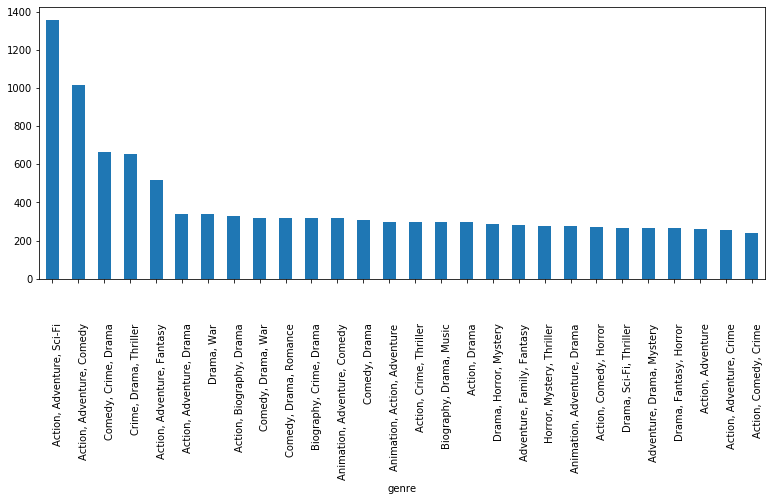

In [177]:
x = movie_ratings.groupby(['genre']).sum().copy()
ax2 = x.n_imdb.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

As seen above, most of the films are action, comedy and sci-fi which is the trend we have right now. Now let's look at the distribution for both ratings from each webstie!

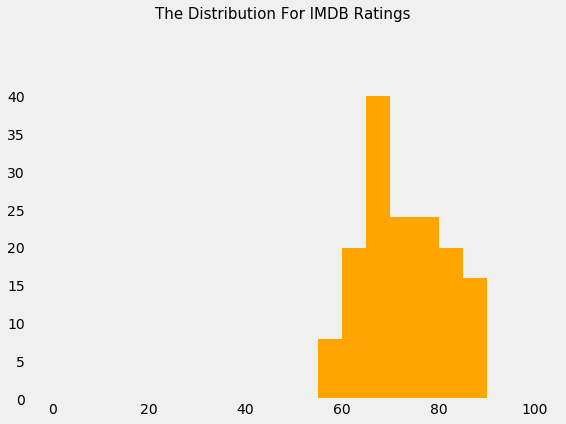

In [385]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
ax.grid(False)
ax.hist(movie_ratings.n_imdb, bins = 20, range = (0,100), color = 'orange')
fig.suptitle('The Distribution For IMDB Ratings',fontsize = 15)
plt.tight_layout(pad = 6)
plt.show()

By looking at the IMDb movie rating histogram, we can see that most ratings are between 60 and 80. There are only a few ratings are either greater than 80 or smaller than 60. In addition, Most of the movies are rated around 70. 

Now let's take a look at Metascore and see the comparison.

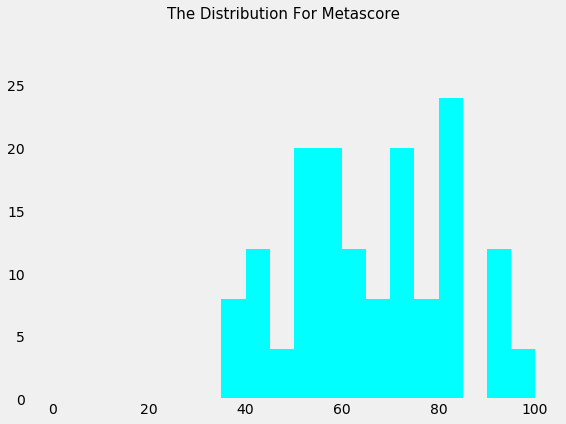

In [384]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
ax.grid(False)
ax.hist(movie_ratings.metascore, bins = 20, range = (0,100), color = 'cyan')
fig.suptitle('The Distribution For Metascore',fontsize = 15)
plt.tight_layout(pad = 6)
plt.show()

It seems like the distribution of Metascore is more normal or spreaded out. Most of the ratings are between 40 to 100. However, there is a little gap around 85. 

Why don't we take a better look by putting them both into a graph for comparason?

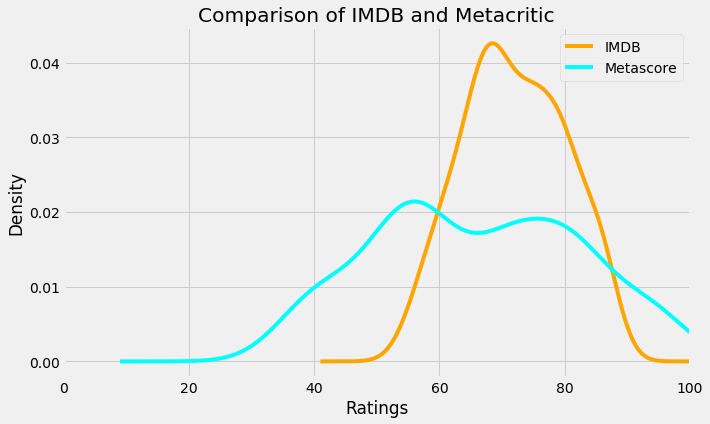

In [398]:
%matplotlib inline
plt.style.use('fivethirtyeight')
movie_ratings['n_imdb'].plot.kde(label = 'IMDB', legend = True, figsize = (10,6), color = 'orange')
movie_ratings['metascore'].plot.kde(label = 'Metascore', legend = True, color = 'cyan')
 
plt.title("Comparison of IMDB and Metacritic") 
plt.xlabel('Ratings')
plt.xlim(0,100)
plt.show()

It’s clear to see that distribution of IMDB movie rating is awfully skewed from the rating 60 to 80 like an intense up and down roller coaster. However, the metascore rating by Metacritic have a more balanced curve.

### Recommendation

After looking at the comparison, I believe the Metacritic might have a better, unbiased and more objective rating even though IMDB might be a popular choice. On the bright side, we know that Metascore from Metacritic is avaiable on IMDB. With that being said, you can still check ratings from both sites and make your own judgement.

From what I have known, Metascore is a weighted average of reviews from professional critics and audiences. This explains why it has a more balanced distribution than IMDB. However, the downside of Metacritic is that most non-English movies are not listed on Metacritic where IMDB has.


In conclusion, both websites have their unique features. Therefore it really depends on what you are looking for. If you would like to see an accurate ratings given by both critics and audicnes. Metacritic is your go to! But if you want to find information for non mainstream movies or non-English movies. IMDB might offer you for information on that.

#### Have fun watching movies!